# Santandar Classification

In [1]:
import numpy as np
import pandas as panda
from matplotlib import pyplot as plot
import seaborn as sns

import pandas as panda
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler,label_binarize

from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV,RepeatedStratifiedKFold,learning_curve

from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, \
        classification_report,confusion_matrix,average_precision_score
from sklearn.linear_model import Perceptron, LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plot
from itertools import cycle
import numpy as np 
from scipy import interp
import seaborn as sns
import itertools, time, datetime
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import mutual_info_classif,f_classif
from numpy import bincount, linspace, mean, std, arange, squeeze

from keras.models import Sequential
from keras.layers import Dense, Activation, GaussianNoise,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import RMSprop, Adam
from keras import regularizers
import warnings

warnings.simplefilter('ignore')
%matplotlib inline


C:\Users\somak\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
np.random.seed(143)

In [3]:
train_data = panda.read_csv('data/train.csv')


In [4]:
train_data.target.value_counts(), train_data.shape

(0    179902
 1     20098
 Name: target, dtype: int64, (200000, 202))

In [5]:
train_data['target'] = train_data.target.astype(np.int64)

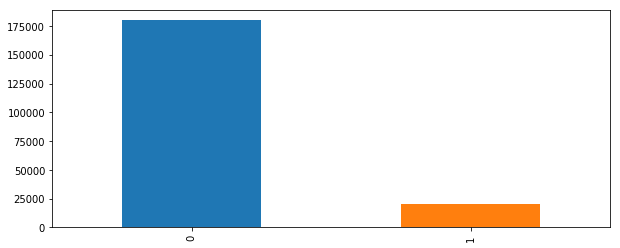

In [6]:
plot.figure(figsize=(10,4))
train_data.target.value_counts().plot(kind='bar')
plot.show()

In [7]:
train_data[[i for i in train_data.columns.tolist() if i not in ['target','id']]].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID_code,200000,200000,train_141865,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
var_0,200000,NaN,NaN,NaN,10.6799,3.04005,0.4084,8.45385,10.5248,12.7582,20.315
var_1,200000,NaN,NaN,NaN,-1.62762,4.05004,-15.0434,-4.74003,-1.60805,1.35862,10.3768
var_2,200000,NaN,NaN,NaN,10.7152,2.64089,2.1171,8.72247,10.58,12.5167,19.353
var_3,200000,NaN,NaN,NaN,6.79653,2.04332,-0.0402,5.25408,6.825,8.3241,13.1883
var_4,200000,NaN,NaN,NaN,11.0783,1.62315,5.0748,9.88317,11.1082,12.2611,16.6714
var_5,200000,NaN,NaN,NaN,-5.06532,7.86327,-32.5626,-11.2004,-4.83315,0.9248,17.2516
var_6,200000,NaN,NaN,NaN,5.40895,0.866607,2.3473,4.7677,5.3851,6.003,8.4477
var_7,200000,NaN,NaN,NaN,16.5458,3.41808,5.3497,13.9438,16.4568,19.1029,27.6918
var_8,200000,NaN,NaN,NaN,0.284162,3.33263,-10.5055,-2.3178,0.3937,2.9379,10.1513


In [8]:
data_type = train_data.dtypes.to_frame().reset_index()
data_type.columns  = ['col_name','col_type']
data_type[data_type.col_type==np.object].head()

,col_name,col_type
0,ID_code,object


In [9]:
train_data.isnull().any().sum()

0

In [11]:
col_names = [i for i in train_data.columns if i not in ['target','ID_code']]

In [12]:
def plot_variance_scree_plot(variance, cumulative_variance = None, title = 'Principal Component vs Explained Ratio', n_components = 14):
    with plot.style.context('seaborn-whitegrid'):
        plot.figure(figsize=(10, 5))

        plot.bar(range(1,n_components), variance, alpha=0.8, align='center',
                label='individual explained variance', color = 'teal') ## since there are 13 dimenison
        plot.step(range(1,n_components), cumulative_variance, where='mid',
                 label='cumulative explained variance', color ='red') if cumulative_variance is not None else None
        plot.plot(variance, color = 'black', label='scree')
        plot.ylabel('Explained variance ratio')
        plot.xlabel('Principal components')
        plot.legend(loc='best')
        plot.tight_layout()
        plot.title(title)
        plot.show()

In [13]:
x = train_data[col_names]
y = train_data.target

In [14]:
pca = PCA(n_components=10)
x_std = StandardScaler().fit_transform(x)
x_pca = pca.fit_transform(x_std)
explained_variance = pca.explained_variance_
explained_variance.shape, pca.components_.shape,x_pca.shape
# plot_variance_scree_plot(explained_variance)
# x_test_pca1 = pca.transform(x_test_std)

((10,), (10, 200), (200000, 10))

In [15]:
tot = sum(explained_variance)
var_exp = [(i / tot)*100 for i in sorted(explained_variance, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
tot, len(var_exp), cum_var_exp.shape

(10.366235129327034, 10, (10,))

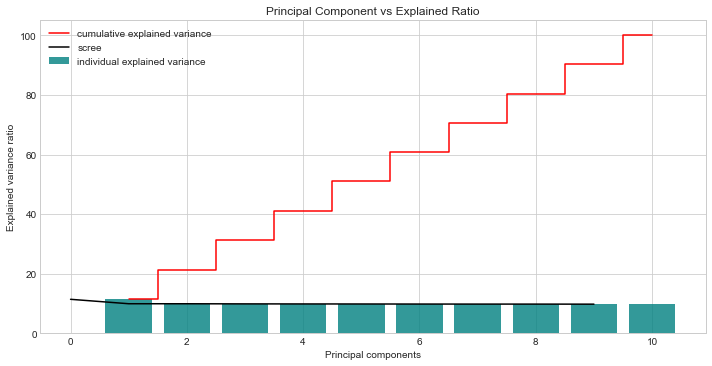

In [16]:
plot_variance_scree_plot(var_exp,cum_var_exp, n_components = pca.components_.shape[0] + 1)

In [17]:
lda = LinearDiscriminantAnalysis(n_components=10, solver='eigen',shrinkage='auto')
x_lda = lda.fit_transform(x,y)
explained_variance = lda.explained_variance_ratio_
explained_variance.shape, x_lda.shape

((1,), (200000, 1))

### STEP 1: Run handful of usual suspect classifiers using selected 50 features giving highest coeff scores

<br><br>

In [18]:
class CodeTimer:
    
    """
        Utility custom contextual class for calculating the time 
        taken for a certain code block to execute
    
    """
    def __init__(self, name=None):
        self.name = " '"  + name + "'" if name else ''

    def __enter__(self):
        self.start = time.clock()

    def __exit__(self, exc_type, exc_value, traceback):
        self.took = (time.clock() - self.start) * 1000.0
        time_taken = datetime.timedelta(milliseconds = self.took)
        print('Code block' + self.name + ' took(HH:MM:SS): ' + str(time_taken))
        
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plot.imshow(cm, interpolation='nearest', cmap=cmap)
    plot.title(title)
    plot.colorbar()
    tick_marks = arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plot.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plot.ylabel('True label')
    plot.xlabel('Predicted label')
#     plot.tight_layout()
    plot.show()

In [19]:

def plotLearningCurve(_x_train, _y_train, learning_model_pipeline,  model_name, k_fold = 10, training_sample_sizes = linspace(0.1,1.0,10), jobsInParallel = 1):
    
    print('num of classes : ',np.bincount(_y_train))
    training_size, training_score, testing_score = learning_curve(estimator = learning_model_pipeline, \
                                                                X = _x_train, \
                                                                y = _y_train, \
                                                                train_sizes = training_sample_sizes, \
                                                                cv = k_fold, \
                                                                n_jobs = jobsInParallel) 


    training_mean = mean(training_score, axis = 1)
    training_std_deviation = std(training_score, axis = 1)
    testing_std_deviation = std(testing_score, axis = 1)
    testing_mean = mean(testing_score, axis = 1 )

    ## we have got the estimator in this case the perceptron running in 10 fold validation with 
    ## equal division of sizes betwwen .1 and 1. After execution, we get the number of training sizes used, 
    ## the training scores for those sizes and the test scores for those sizes. we will plot a scatter plot 
    ## to see the accuracy results and check for bias vs variance

    # training_size : essentially 10 sets of say a1, a2, a3,,...a10 sizes (this comes from train_size parameter, here we have given linespace for equal distribution betwwen 0.1 and 1 for 10 such values)
    # training_score : training score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    # testing_score : testing score for the a1 samples, a2 samples...a10 samples, each samples run 10 times since cv value is 10
    ## the mean and std deviation for each are calculated simply to show ranges in the graph

    plot.plot(training_size, training_mean, label= "Training Data", marker= '+', color = 'blue', markersize = 8)
    plot.fill_between(training_size, training_mean+ training_std_deviation, training_mean-training_std_deviation, color='blue', alpha =0.12 )

    plot.plot(training_size, testing_mean, label= "Testing/Validation Data", marker= '*', color = 'green', markersize = 8)
    plot.fill_between(training_size, testing_mean+ training_std_deviation, testing_mean-training_std_deviation, color='green', alpha =0.14 )

    plot.title("Scoring of our training and testing data vs sample sizes for model:"+model_name)
    plot.xlabel("Number of Samples")
    plot.ylabel("Accuracy")
    plot.legend(loc= 'best')
    plot.show()
    
def plot_roc_auc_curve(false_positive_rate, true_positive_rate, model_name):
        
    plot.figure(figsize=(10,3))
    plot.plot(list(false_positive_rate), list(true_positive_rate),  label = "ROC Curve for model: "+model_name)     
    plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing')
    plot.plot([0, 0, 1], [0,1, 1], ':', label = 'Perfect Score')
    auc_score = auc(false_positive_rate, true_positive_rate)
    plot.title('ROC Curve for model: %s with AUC %.2f'%(model_name, auc_score))
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.legend(loc='best')
    plot.show()
    
    
def plot_precision_recall_curve(precision, recall, model_name):
    
    plot.figure(figsize=(10,3))
    plot.plot(list(recall), list(precision),  label = "Precision/Recall Curve for model: "+model_name)     
#     plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing') #
    plot.title('Precision Recall Curve for model: %s'%model_name)
    plot.xlabel('Recall')
    plot.ylabel('Precision')
    plot.legend(loc='best')
    plot.show()


    


In [20]:
def runGridSearchAndPredict(pipeline,model_name, x_train, y_train, x_test, y_test, param_grid, n_jobs = 1, cv = 10, score = 'accuracy'):
#     pass

    response =  {}
    training_timer       = CodeTimer('training')
    testing_timer        = CodeTimer('testing')
    learning_curve_timer = CodeTimer('learning_curve')
    predict_proba_timer  = CodeTimer('predict_proba')
    
    with training_timer:
        
        gridsearch = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, n_jobs = n_jobs, scoring = score)

        search = gridsearch.fit(x_train,y_train)

        print("Grid Search Best parameters ", search.best_params_)
        print("Grid Search Best score ", search.best_score_)

    with testing_timer:
        y_prediction = gridsearch.predict(x_test)
            
    print("F1 score %s" %f1_score(y_test,y_prediction, average ='weighted'))
    print("Classification report  \n %s" %(classification_report(y_test, y_prediction)))
    
    with learning_curve_timer:
#         plotLearningCurve(x_train, y_train, search.best_estimator_, model_name, k_fold=cv)
#         _matrix = confusion_matrix(y_true = _y_test ,y_pred = y_prediction, labels = list(range(_y_test.shape[1])))
        _matrix = confusion_matrix(y_true = y_test ,y_pred = y_prediction, labels = list(set(y_test)))
        classes = list(set(y_test))
        plot_confusion_matrix(_matrix, classes, title = "Confusion matrix for model:"+model_name)
        
    with predict_proba_timer:

        if hasattr(gridsearch.best_estimator_, 'predict_proba'):
            
            print('inside decision function')
            y_probability = gridsearch.predict_proba(x_test)
            number_of_classes = len(np.unique(y_train))
            false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probability[:, 1])
            response['roc_auc_score'] = roc_auc_score(y_test, y_probability[:,1])
            response['roc_curve'] = (false_positive_rate, true_positive_rate)  
            response['roc_curve_false_positive_rate'] = false_positive_rate
            response['roc_curve_true_positive_rate'] = true_positive_rate
            precision, recall, _ = precision_recall_curve(y_test, y_probability[:,1])
            plot_roc_auc_curve(false_positive_rate, true_positive_rate, model_name)
            plot_precision_recall_curve(precision, recall, model_name)
            
        else: ## eg SVM, Perceptron doesnt have predict_proba method
            
            response['roc_auc_score'] = 0
            response['roc_curve'] = 0
            response['roc_curve_false_positive_rate'] = 0
            response['roc_curve_true_positive_rate'] = 0
    
    response['learning_curve_time'] = learning_curve_timer.took
    response['testing_time'] = testing_timer.took
    response['_y_prediction'] = y_prediction
#     response['accuracy_score'] = accuracy_score(y_test,y_prediction)
    response['training_time'] = training_timer.took
    response['f1_score']  = f1_score(y_test, y_prediction, average ='weighted')
    response['f1_score_micro']  = f1_score(y_test, y_prediction, average ='micro')
    response['f1_score_macro']  = f1_score(y_test, y_prediction, average ='macro')
    response['best_estimator'] = search.best_estimator_
    response['confusion_matrix'] = _matrix
    
    return response


def plotROCCurveAcrossModels(positive_rates_sequence, model_name):
    
    plot.figure(figsize=(10,5))
    for plot_values, label_name in zip(positive_rates_sequence, model_name):
        
        plot.plot(list(plot_values[0]), list(plot_values[1]),  label = "ROC Curve for model: "+label_name)
        
    plot.plot([0, 1], [0, 1], 'k--', label = 'Random Guessing') #
    plot.title('ROC Curve across models')
    plot.xlabel('False Positive Rate')
    plot.ylabel('True Positive Rate')
    plot.legend(loc='best')
    plot.show()

In [21]:

def execute( _x_train,
             _y_train,
             _x_test,
             _y_test, 
            classifiers, 
            classifier_names, 
            classifier_param_grid,
            cv  = 10 , 
            score = 'accuracy',
            scaler = StandardScaler()
           ):
    
    '''
    This method will run your data sets against the model specified 
    Models will be fed through a pipeline where the first step would be to
    execute a scaling operation.
    
    Method will also call additional lower level methods in order to plot
    precision curve, roc curve, learning curve and will also prepare a confusion matrix
    
    :returns: dict containing execution metrics such as time taken, accuracy scores
    :returntype: dict
    
    '''

    timer = CodeTimer(name='overalltime')
    model_metrics = {}

    with timer:
        for model, model_name, model_param_grid in zip(classifiers, classifier_names, classifier_param_grid):

            pipeline_steps = [('scaler', scaler),(model_name, model)] if scaler is not None else [(model_name, model)]
            pipeline = Pipeline(pipeline_steps)

            result = runGridSearchAndPredict(pipeline, 
                                             model_name,
                                             _x_train,
                                             _y_train,
                                             _x_test,
                                             _y_test, 
                                             model_param_grid ,
                                             cv = cv,
                                             score = score)

            _y_prediction = result['_y_prediction']

            model_metrics[model_name] = {}
            model_metrics[model_name]['confusion_matrix'] = result.get('confusion_matrix')
            model_metrics[model_name]['training_time'] = result.get('training_time')
            model_metrics[model_name]['testing_time'] = result.get('testing_time')
            model_metrics[model_name]['learning_curve_time'] = result.get('learning_curve_time')
            model_metrics[model_name]['f1_score'] = result.get('f1_score')
            model_metrics[model_name]['f1_score_macro'] = result.get('f1_score_macro')
            model_metrics[model_name]['f1_score_micro'] = result.get('f1_score_micro')
            model_metrics[model_name]['roc_auc_score'] = result.get('roc_auc_score')
            model_metrics[model_name]['roc_curve_true_positive_rate'] = result.get('roc_curve_true_positive_rate')
            model_metrics[model_name]['roc_curve_false_positive_rate'] = result.get('roc_curve_false_positive_rate')

            model_metrics[model_name]['best_estimator'] = result.get('best_estimator')


    print(timer.took)
    
    return model_metrics


In [95]:
# input_shape = x_train.shape[1]

import keras.backend as K
from sklearn.metrics import roc_auc_score
def keras_roc_score(y_true, y_pred):
    return roc_auc_score(y_true,y_pred)

import tensorflow as tf
from keras import backend as K

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
#     K.get_session().run(tf.local_variables_initializer())
    return auc
def auroc(y_true, y_pred):
#     bin = np.bincount(y_true.astype(n))
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

def prepare_classifier(noise_level = 0.01, input_shape = 1, dropout_rate = 0.2, l2_penalty = 0.02, l1_penalty= 0.01):
    
    kernel_regularizer = regularizers.l2(l2_penalty)
    activity_regularizer = regularizers.l1(l1_penalty)
    
    model = Sequential()
#     model.add(GaussianNoise(noise_level, input_shape = (input_shape,)))
    model.add(Dense(30, activation='relu', input_shape = (input_shape,),kernel_initializer= 'uniform', kernel_regularizer=kernel_regularizer, activity_regularizer = activity_regularizer))
#     model.add(GaussianNoise(noise_level))
#     model.add(Dropout(rate = dropout_rate))
    
#     model.add(Dense(250, activation='relu',kernel_initializer= 'uniform', kernel_regularizer=kernel_regularizer, activity_regularizer = activity_regularizer))
    model.add(Dropout(rate = dropout_rate))  
#     model.add(GaussianNoise(noise_level))              
    model.add(Dense(1, activation='sigmoid'))
    

#     optimizer = Adam(0.01)
    optimizer = RMSprop(0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics = [auroc,'accuracy'])
    
    return model


keras_classifier = KerasClassifier(build_fn = prepare_classifier)

In [23]:
keras_classifier.get_params().keys()

dict_keys(['epochs', 'batch_size', 'build_fn'])

In [24]:

classifiers = [
#     Perceptron(random_state = 1),
#     LogisticRegression(random_state = 1),
#     LogisticRegression(random_state = 1, solver='liblinear'),
#     LogisticRegression(random_state = 1, solver='newton-cg'),
#     LogisticRegression(random_state = 1, solver='sag'),
#     DecisionTreeClassifier(),
#     RandomForestClassifier(random_state = 1),
#     KNeighborsClassifier(metric = 'minkowski'),
#     RidgeClassifier(random_state = 123), 
#     SVC(kernel="linear"),
#     SVC(),
#     ExtraTreeClassifier(random_state = 123),
#     GaussianProcessClassifier(random_state = 123),
#     BernoulliNB(),
#     BaggingClassifier(base_estimator = LogisticRegression(random_state = 1)),
#     BaggingClassifier(base_estimator = BernoulliNB()),
#     GradientBoostingClassifier(random_state= 123),
#     LGBMClassifier(objective = 'binary'),
#     XGBClassifier(objective = 'binary:logistic')
    keras_classifier
]


classifier_names = [
#             'perceptron',
#             'logisticregression',
#             'logisticregression_liblinear_l2',
#             'logisticregression_newton_cg',
#             'logisticregression_sag',
#             'decisiontreeclassifier',
#             'randomforestclassifier',
#             'kneighborsclassifier',
#             'ridge',
#             'linear_svc',
#             'gamma_svc',
#             'extra_trees',
#             'gaussian_process',
#             'bernoulli',
#             'bagging_logistic',
#             'bagging_bernoulli',
#             'gradient_boosting_classifier',
#             'lgbm_classifier',
#             'xgb'
            'keras',
]

classifier_param_grid = [
            
#             {'perceptron__max_iter': [5,10,30], 'perceptron__eta0': [.1]},
#             {
#              'logisticregression__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression__penalty':['l1','l2'],
#              'logisticregression__solver':['saga','liblinear']
#             },
#             {
#              'logisticregression_liblinear_l2__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression_liblinear_l2__penalty':['l2'],
#              'logisticregression_liblinear_l2__dual':[True]
#             },
#             {
#              'logisticregression_newton_cg__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression_newton_cg__penalty':['l2'],
#             },
#             {
#              'logisticregression_sag__C':[1.2,0.02,2.2,4, 0.01, 0.05], 
#              'logisticregression_sag__penalty':['l2'],
#             },
    
#             {'decisiontreeclassifier__max_depth':[6,8,10],
#              'decisiontreeclassifier__criterion':['gini','entropy'],
#              'decisiontreeclassifier__max_features':['auto','sqrt','log2'],
#             },
#             {'randomforestclassifier__n_estimators':[6,8,12],'randomforestclassifier__criterion': ['gini','entropy']} ,
#             {'kneighborsclassifier__n_neighbors':[4,6,10]},
#             {'ridge__alpha':[1,1.2,0.9],'ridge__max_iter':[100,300,500]},
#             {'linear_svc__C':[0.025]},
#             {'gamma_svc__gamma':[2,4],'gamma_svc__C':[1,5]},
#             {'extra_trees__max_depth':[6,8,12],'extra_trees__criterion': ['gini','entropy']} ,
#             {'gaussian_process__max_iter_predict':[200,400]} ,
#             {'bernoulli__alpha':[0.2,0.6,1.2]} ,
#             {'bagging_logistic__base_estimator__C':[1.2,0.02,2.2,4], 
#              'bagging_logistic__base_estimator__penalty':['l1','l2'],
#              'bagging_logistic__n_estimators': [5,8,10]
#             },
#             {'bagging_bernoulli__base_estimator__alpha':[1.2,0.02,2.2,4], 
#              'bagging_bernoulli__n_estimators': [5,8,10]
#             },
#             {
#                 'gradient_boosting_classifier__loss':['deviance','exponential'],
#                 'gradient_boosting_classifier__learning_rate':[0.5,1.2],
#                 'gradient_boosting_classifier__n_estimators':[100,500,1000],
#                 'gradient_boosting_classifier__criterion':['friedman_mse','mse','mae'],
#                 'gradient_boosting_classifier__max_depth':[6,8,16,20],
#             },
#             {
#                  'lgbm_classifier__num_leaves':[25,], \
#                  'lgbm_classifier__min_data_in_leaf':[100],\
#                  'lgbm_classifier__max_depth':[20,], \
#                  'lgbm_classifier__learning_rate' : [0.01,],\
#                  'lgbm_classifier__min_child_samples' :[2,], \
#                  'lgbm_classifier__n_estimators' : [5000,], \
#                  'lgbm_classifier__num_boost_round' : [10000], \
#                  'lgbm_classifier__feature_fraction' : [0.5,], \
#                  'lgbm_classifier__bagging_freq' : [1,], \
#                  'lgbm_classifier__bagging_seed' : [123], \
#                 'lgbm_classifier__boosting_type' : ['gbdt'], \
#                 'lgbm_classifier__min_sum_hessian_in_leaf' : [0.000446], \
#             },
#              {
#                 'xgb__max_depth':[6,8,10],
#                  'xgb__learning_rate':[0.1,0.5,1,2],
#                  'xgb__n_estimators':[100,400,1000],             
#                  'xgb__booster':['gbtree','dart'],
#                  'xgb__subsample':[0.5, 0.2,0.8]
#             },
    
            {
                'keras__epochs':[600],
                'keras__batch_size':[1000],
            }
]


In [25]:
# x = train_data[[i for i in train_data.columns.tolist() if i not in ['target','id']]]
# x = train_data[reqd_columns[:51]]
x = x_lda
y = train_data['target']

x_train,x_test,y_train,y_test = train_test_split(x,y , stratify = y, test_size = 0.3, random_state = 123)

In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from imblearn.combine import SMOTETomek

tl = TomekLinks(return_indices=True, ratio='majority')
_x_train_tomek, _y_train_tomek, id_tl = tl.fit_sample(x_train, y_train)

smt = SMOTETomek(ratio='auto')
_x_train_smt, _y_train_smt = smt.fit_sample(x_train, y_train)

smote = SMOTE(ratio='minority')
x_train_smote, y_train_smote = smote.fit_sample(x_train,y_train)

In [27]:
x_train_smote.shape, y_train_smote.shape, _x_train_tomek.shape, _y_train_tomek.shape

((251862, 1), (251862,), (133832, 1), (133832,))

In [28]:
np.bincount(y_train_smote)

array([125931, 125931], dtype=int64)

In [29]:
cv = StratifiedKFold(n_splits = 5, shuffle= True, random_state =123)
score= 'roc_auc'

In [97]:
# y = y.values
scaler = StandardScaler()
x=train_data[col_names].values
x = scaler.fit_transform(x)
x=x_lda
keras_classifier = prepare_classifier(input_shape=x.shape[1])
for train_index, test_index in cv.split(x, y):

    x_train = x[train_index]
    y_train = y[train_index]
    x_test = x[test_index]
    y_test = y[test_index]
#     smt = SMOTETomek(ratio=1)
#     _x_train_smt, _y_train_smt = smt.fit_sample(x_train, y_train)
    print('bin in train target : ',np.bincount(y_train))
    print('bin in test target : ',np.bincount(y_test))
    
    history = keras_classifier.fit(x_train, \
                        y_train, \
                        validation_data=(x_test,y_test),
                        epochs=500, \
                        batch_size = len(x_train), \
                        verbose=1, \
#                         shuffle=True ,\
#                         callbacks=[es],
#                         class_weight = {0:.2,1:.6}
                       )

bin in train target :  [143921  16078]
bin in test target :  [35981  4020]
Train on 159999 samples, validate on 40001 samples
Epoch 1/500
159999/159999 [==============================] - 6s 40us/step - loss: 68749.2188 - auroc: 0.4692 - acc: 0.1021 - val_loss: 12584.9121 - val_auroc: 0.1407 - val_acc: 0.1005
Epoch 2/500
159999/159999 [==============================] - 5s 30us/step - loss: 50335.9727 - auroc: 0.4771 - acc: 0.1269 - val_loss: 10877.8242 - val_auroc: 0.1407 - val_acc: 0.1004
Epoch 3/500
159999/159999 [==============================] - 5s 29us/step - loss: 43508.7461 - auroc: 0.4707 - acc: 0.4191 - val_loss: 9841.4072 - val_auroc: 0.1407 - val_acc: 0.8995
Epoch 4/500
159999/159999 [==============================] - 5s 29us/step - loss: 39360.7188 - auroc: 0.4299 - acc: 0.8995 - val_loss: 9020.6133 - val_auroc: 0.8592 - val_acc: 0.8995
Epoch 5/500
159999/159999 [==============================] - 5s 29us/step - loss: 36079.5117 - auroc: 0.6214 - acc: 0.8995 - val_loss: 8316.

Epoch 46/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.9291 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9272 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 47/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.9277 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9261 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 48/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.9268 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9252 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 49/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9256 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9243 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 50/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9250 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9235 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 51/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9239 - auroc: 0.5000 - acc: 0.

Epoch 93/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9051 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9048 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 94/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9046 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9043 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 95/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9043 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9039 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 96/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.9038 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9035 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 97/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.9036 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.9030 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 98/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.9030 - auroc: 0.5000 - acc: 0.

159999/159999 [==============================] - 4s 28us/step - loss: 0.8820 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8813 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 140/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8812 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8806 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 141/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8806 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8799 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 142/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8798 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8791 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 143/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.8791 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8784 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 144/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8782 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 186/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8172 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8148 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 187/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8146 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8122 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 188/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8121 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8095 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 189/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.8093 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8068 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 190/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.8067 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.8040 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 191/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.8041 - auroc: 0.5000 - a

159999/159999 [==============================] - 5s 29us/step - loss: 0.6598 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.6566 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 233/500
159999/159999 [==============================] - 4s 28us/step - loss: 0.6567 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.6535 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 234/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.6534 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.6504 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 235/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.6504 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.6475 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 236/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.6473 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.6446 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 237/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.6445 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 279/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5899 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5896 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 280/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5896 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5892 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 281/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5892 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5888 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 282/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5889 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5885 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 283/500
159999/159999 [==============================] - 4s 28us/step - loss: 0.5884 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5881 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 284/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5881 - auroc: 0.5000 - a

159999/159999 [==============================] - 5s 29us/step - loss: 0.5748 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5746 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 326/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5746 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5743 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 327/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.5741 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5739 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 328/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5739 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5736 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 329/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5737 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5733 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 330/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5732 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 372/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5604 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5601 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 373/500
159999/159999 [==============================] - 4s 27us/step - loss: 0.5599 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5597 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 374/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5598 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5595 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 375/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5594 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5592 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 376/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5592 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5588 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 377/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5589 - auroc: 0.5000 - a

Epoch 418/500
159999/159999 [==============================] - 5s 31us/step - loss: 0.5467 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5463 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 419/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.5462 - auroc: 0.5000 - acc: 0.8995 - val_loss: 13.6524 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 420/500
159999/159999 [==============================] - 5s 31us/step - loss: 52.9740 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.2995 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 421/500
159999/159999 [==============================] - 5s 30us/step - loss: 19.5618 - auroc: 0.5000 - acc: 0.8995 - val_loss: 3.4646 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 422/500
159999/159999 [==============================] - 5s 31us/step - loss: 12.2242 - auroc: 0.5000 - acc: 0.8995 - val_loss: 3.4198 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 423/500
159999/159999 [==============================] - 5s 31us/step - loss: 12.0449 - auroc: 0.500

Epoch 464/500
159999/159999 [==============================] - 5s 29us/step - loss: 15.6245 - auroc: 0.5000 - acc: 0.8995 - val_loss: 8.1606 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 465/500
159999/159999 [==============================] - 5s 29us/step - loss: 31.0438 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5328 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 466/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5329 - auroc: 0.5000 - acc: 0.8995 - val_loss: 4.3052 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 467/500
159999/159999 [==============================] - 5s 30us/step - loss: 15.6236 - auroc: 0.5000 - acc: 0.8995 - val_loss: 4.3460 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 468/500
159999/159999 [==============================] - 5s 29us/step - loss: 15.7876 - auroc: 0.5000 - acc: 0.8995 - val_loss: 8.0773 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 469/500
159999/159999 [==============================] - 5s 29us/step - loss: 30.7142 - auroc: 0.500

Epoch 10/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5207 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5204 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 11/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5205 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5201 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 12/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.5200 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5199 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 13/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5198 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5196 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 14/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5195 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5193 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 15/500
159999/159999 [==============================] - 5s 31us/step - loss: 0.5193 - auroc: 0.5000 - acc: 0.

Epoch 57/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5082 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5079 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 58/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.5080 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5076 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 59/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5077 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5074 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 60/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5073 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5071 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 61/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.5072 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5068 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 62/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.5068 - auroc: 0.5000 - acc: 0.

Epoch 104/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.4961 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4959 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 105/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4960 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4957 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 106/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4956 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4954 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 107/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4953 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4951 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 108/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4953 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4949 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 109/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4949 - auroc: 0.5000 - a

159999/159999 [==============================] - 5s 29us/step - loss: 0.4849 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4846 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 151/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.4846 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4844 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 152/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4844 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4842 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 153/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4842 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4839 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 154/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4839 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4837 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 155/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4836 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 197/500
159999/159999 [==============================] - 4s 28us/step - loss: 0.4739 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4736 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 198/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4737 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4734 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 199/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4733 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4732 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 200/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4732 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4729 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 201/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4730 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4727 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 202/500
159999/159999 [==============================] - 4s 28us/step - loss: 0.4726 - auroc: 0.5000 - a

159999/159999 [==============================] - 5s 30us/step - loss: 0.4635 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4633 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 244/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4634 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4631 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 245/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4631 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4629 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 246/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4629 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4626 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 247/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4627 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4625 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 248/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4625 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 290/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4535 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4533 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 291/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4532 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4530 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 292/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4531 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4528 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 293/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4528 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4526 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 294/500
159999/159999 [==============================] - 4s 28us/step - loss: 0.4525 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4524 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 295/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4524 - auroc: 0.5000 - a

Epoch 336/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4440 - auroc: 0.5000 - acc: 0.8995 - val_loss: 6.6515 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 337/500
159999/159999 [==============================] - 5s 29us/step - loss: 25.2754 - auroc: 0.5000 - acc: 0.8995 - val_loss: 3.0602 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 338/500
159999/159999 [==============================] - 5s 29us/step - loss: 10.9103 - auroc: 0.5000 - acc: 0.8995 - val_loss: 2.4568 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 339/500
159999/159999 [==============================] - 5s 29us/step - loss: 8.4972 - auroc: 0.5000 - acc: 0.8995 - val_loss: 10.0910 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 340/500
159999/159999 [==============================] - 5s 30us/step - loss: 39.0355 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4431 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 341/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4430 - auroc: 0.5000

Epoch 382/500
159999/159999 [==============================] - 5s 30us/step - loss: 28.3393 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4349 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 383/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.4349 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4347 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 384/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.4346 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4345 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 385/500
159999/159999 [==============================] - 5s 28us/step - loss: 0.4345 - auroc: 0.5000 - acc: 0.8995 - val_loss: 3.9183 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 386/500
159999/159999 [==============================] - 5s 29us/step - loss: 14.3706 - auroc: 0.5000 - acc: 0.8995 - val_loss: 7.4045 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 387/500
159999/159999 [==============================] - 5s 30us/step - loss: 28.3166 - auroc: 0.5000 

Epoch 428/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 429/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4263 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4262 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 430/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4263 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4260 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 431/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4260 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4259 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 432/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4258 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4257 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 433/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4257 - auroc: 0.5000 - a

159999/159999 [==============================] - 5s 30us/step - loss: 0.4185 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4183 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 475/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4182 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4181 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 476/500
159999/159999 [==============================] - 5s 29us/step - loss: 0.4181 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4180 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 477/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4179 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4178 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 478/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4178 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4176 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 479/500
159999/159999 [==============================] - 5s 30us/step - loss: 0.4176 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 20/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.4108 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4106 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 21/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4106 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4104 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 22/500
160000/160000 [==============================] - 5s 28us/step - loss: 0.4105 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4103 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 23/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4102 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4101 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 24/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4102 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4100 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 25/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4100 - auroc: 0.5000 - acc: 0.

Epoch 67/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4034 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4032 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 68/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4031 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4030 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 69/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.4031 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4028 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 70/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4028 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4027 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 71/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.4028 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.4026 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 72/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.4025 - auroc: 0.5000 - acc: 0.

Epoch 114/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3963 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3962 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 115/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3961 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3960 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 116/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3960 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3959 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 117/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3958 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3957 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 118/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3957 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3956 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 119/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3955 - auroc: 0.5000 - a

160000/160000 [==============================] - 5s 29us/step - loss: 0.3898 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3897 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 161/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3897 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3895 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 162/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3895 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3894 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 163/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3894 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3892 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 164/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3892 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3891 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 165/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3891 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 207/500
160000/160000 [==============================] - 5s 28us/step - loss: 0.3836 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3834 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 208/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3833 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3833 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 209/500
160000/160000 [==============================] - 5s 28us/step - loss: 0.3833 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3832 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 210/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3833 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3830 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 211/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3830 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3829 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 212/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3830 - auroc: 0.5000 - a

Epoch 253/500
160000/160000 [==============================] - 5s 30us/step - loss: 9.5909 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3777 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 254/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3777 - auroc: 0.5000 - acc: 0.8995 - val_loss: 1.1941 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 255/500
160000/160000 [==============================] - 5s 29us/step - loss: 3.6428 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3775 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 256/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3774 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3773 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 257/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3773 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3772 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 258/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3773 - auroc: 0.5000 - a

Epoch 299/500
160000/160000 [==============================] - 5s 29us/step - loss: 10.0533 - auroc: 0.5000 - acc: 0.8995 - val_loss: 2.7912 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 300/500
160000/160000 [==============================] - 5s 29us/step - loss: 10.0466 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.2110 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 301/500
160000/160000 [==============================] - 5s 29us/step - loss: 19.7247 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3722 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 302/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3721 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.2076 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 303/500
160000/160000 [==============================] - 5s 29us/step - loss: 19.7119 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.2142 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 304/500
160000/160000 [==============================] - 5s 29us/step - loss: 19.7384 - auroc: 0.500

Epoch 345/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3675 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3674 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 346/500
160000/160000 [==============================] - 4s 28us/step - loss: 0.3673 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3672 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 347/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3672 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3671 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 348/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3672 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3670 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 349/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3670 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3669 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 350/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3670 - auroc: 0.5000 - a

160000/160000 [==============================] - 5s 28us/step - loss: 0.3628 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3627 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 392/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3627 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3626 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 393/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3625 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3625 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 394/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3625 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3624 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 395/500
160000/160000 [==============================] - 5s 30us/step - loss: 0.3623 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3623 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 396/500
160000/160000 [==============================] - 5s 29us/step - loss: 0.3623 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 438/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3583 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3583 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 439/500
160000/160000 [==============================] - 3s 18us/step - loss: 0.3582 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3581 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 440/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3582 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3581 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 441/500
160000/160000 [==============================] - 3s 20us/step - loss: 0.3580 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3580 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 442/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3580 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3579 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 443/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3578 - auroc: 0.5000 - a

160000/160000 [==============================] - 3s 19us/step - loss: 0.3544 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3542 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 485/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3541 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3541 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 486/500
160000/160000 [==============================] - 3s 18us/step - loss: 0.3541 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3541 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 487/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3541 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3540 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 488/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3539 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3539 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 489/500
160000/160000 [==============================] - 3s 19us/step - loss: 0.3539 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 30/500
160001/160001 [==============================] - 4s 25us/step - loss: 0.3507 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3505 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 31/500
160001/160001 [==============================] - 4s 24us/step - loss: 0.3506 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3504 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 32/500
160001/160001 [==============================] - 4s 24us/step - loss: 0.3504 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3503 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 33/500
160001/160001 [==============================] - 4s 23us/step - loss: 0.3504 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3503 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 34/500
160001/160001 [==============================] - 4s 24us/step - loss: 0.3502 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3502 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 35/500
160001/160001 [==============================] - 4s 26us/step - loss: 0.3502 - auroc: 0.5000 - acc: 0.

Epoch 77/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3471 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3470 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 78/500
160001/160001 [==============================] - 4s 22us/step - loss: 0.3471 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3470 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 79/500
160001/160001 [==============================] - 4s 23us/step - loss: 0.3471 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3538 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 80/500
160001/160001 [==============================] - 4s 22us/step - loss: 0.3739 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3468 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 81/500
160001/160001 [==============================] - 4s 22us/step - loss: 0.3469 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3467 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 82/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3469 - auroc: 0.5000 - acc: 0.

Epoch 124/500
160001/160001 [==============================] - 3s 21us/step - loss: 5.0711 - auroc: 0.5000 - acc: 0.8995 - val_loss: 1.5236 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 125/500
160001/160001 [==============================] - 3s 21us/step - loss: 5.0625 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5135 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 126/500
160001/160001 [==============================] - 3s 21us/step - loss: 1.0228 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.5523 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 127/500
160001/160001 [==============================] - 3s 20us/step - loss: 1.1782 - auroc: 0.5000 - acc: 0.8995 - val_loss: 1.8826 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 128/500
160001/160001 [==============================] - 3s 20us/step - loss: 6.4992 - auroc: 0.5000 - acc: 0.8995 - val_loss: 3.6027 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 129/500
160001/160001 [==============================] - 3s 20us/step - loss: 13.3796 - auroc: 0.5000 - 

160001/160001 [==============================] - 3s 22us/step - loss: 5.0685 - auroc: 0.5000 - acc: 0.8995 - val_loss: 1.5172 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 171/500
160001/160001 [==============================] - 3s 21us/step - loss: 5.0456 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.0622 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 172/500
160001/160001 [==============================] - 3s 21us/step - loss: 19.2256 - auroc: 0.5000 - acc: 0.8995 - val_loss: 1.5208 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 173/500
160001/160001 [==============================] - 3s 21us/step - loss: 5.0600 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3409 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 174/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3409 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3409 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 175/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3409 - auroc: 0.5000 - acc: 0.8995 - 

160001/160001 [==============================] - 3s 21us/step - loss: 14.5338 - auroc: 0.5000 - acc: 0.8995 - val_loss: 7.4363 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 217/500
160001/160001 [==============================] - 3s 21us/step - loss: 28.7289 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3385 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 218/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3385 - auroc: 0.5000 - acc: 0.8995 - val_loss: 3.8735 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 219/500
160001/160001 [==============================] - 3s 20us/step - loss: 14.4781 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.0557 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 220/500
160001/160001 [==============================] - 3s 21us/step - loss: 19.2071 - auroc: 0.5000 - acc: 0.8995 - val_loss: 1.5186 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 221/500
160001/160001 [==============================] - 3s 21us/step - loss: 5.0592 - auroc: 0.5000 - acc: 0.8995

Epoch 263/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3364 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3362 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 264/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3362 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3362 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 265/500
160001/160001 [==============================] - 3s 18us/step - loss: 0.3362 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3362 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 266/500
160001/160001 [==============================] - 3s 18us/step - loss: 0.3362 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3361 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 267/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3361 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3361 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 268/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3361 - auroc: 0.5000 - a

160001/160001 [==============================] - 3s 18us/step - loss: 0.3343 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3343 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 310/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3343 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3342 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 311/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3343 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3342 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 312/500
160001/160001 [==============================] - 3s 18us/step - loss: 0.3341 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3341 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 313/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3341 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3341 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 314/500
160001/160001 [==============================] - 3s 18us/step - loss: 0.3342 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 356/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3325 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3325 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 357/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3325 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3324 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 358/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3325 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3324 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 359/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3324 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3324 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 360/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3324 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3323 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 361/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3324 - auroc: 0.5000 - a

160001/160001 [==============================] - 4s 22us/step - loss: 0.3310 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3310 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 403/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3310 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3310 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 404/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3309 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3309 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 405/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3309 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3309 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 406/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3309 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3309 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 407/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3309 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 449/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3305 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3297 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 450/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3297 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3297 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 451/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3296 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3296 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 452/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3296 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3296 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 453/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3296 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3296 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 454/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3296 - auroc: 0.5000 - a

160001/160001 [==============================] - 3s 21us/step - loss: 0.3287 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3286 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 496/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3286 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3286 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 497/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3286 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3286 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 498/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3286 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3483 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 499/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.4070 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3285 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 500/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3287 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 41/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3279 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3459 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 42/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.4002 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3278 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 43/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3279 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3278 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 44/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3278 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3497 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 45/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.4156 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3278 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 46/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3278 - auroc: 0.5000 - acc: 0.

Epoch 88/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.4155 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3704 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 89/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.5001 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3945 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 90/500
160001/160001 [==============================] - 3s 18us/step - loss: 0.5966 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3495 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 91/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.4165 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3704 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 92/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.5005 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3713 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 93/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.5040 - auroc: 0.5000 - acc: 0.

Epoch 135/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3269 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3268 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 136/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3268 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3268 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 137/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3267 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3268 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 138/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3267 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3267 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 139/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3268 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3267 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 140/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3268 - auroc: 0.5000 - a

160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3266 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 182/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 183/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 184/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 185/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 186/500
160001/160001 [==============================] - 3s 21us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 228/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 229/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 230/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 231/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3264 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 232/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 233/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3264 - auroc: 0.5000 - a

160001/160001 [==============================] - 3s 21us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 275/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 276/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 277/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 278/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 279/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 321/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 322/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3266 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 323/500
160001/160001 [==============================] - 4s 23us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 324/500
160001/160001 [==============================] - 4s 24us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 325/500
160001/160001 [==============================] - 4s 22us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 326/500
160001/160001 [==============================] - 4s 23us/step - loss: 0.3265 - auroc: 0.5000 - a

160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 368/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 369/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 370/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3265 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 371/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 372/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - v

Epoch 414/500
160001/160001 [==============================] - 3s 20us/step - loss: 12.4644 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.6638 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 415/500
160001/160001 [==============================] - 3s 20us/step - loss: 1.6757 - auroc: 0.5000 - acc: 0.8995 - val_loss: 4.5083 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 416/500
160001/160001 [==============================] - 3s 20us/step - loss: 17.0526 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 417/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 418/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 419/500
160001/160001 [==============================] - 3s 19us/step - loss: 0.3265 - auroc: 0.5000 -

Epoch 460/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 461/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 0.3264 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 462/500
160001/160001 [==============================] - 3s 20us/step - loss: 0.3265 - auroc: 0.5000 - acc: 0.8995 - val_loss: 5.4481 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 463/500
160001/160001 [==============================] - 3s 19us/step - loss: 20.8105 - auroc: 0.5000 - acc: 0.8995 - val_loss: 2.2962 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 464/500
160001/160001 [==============================] - 3s 20us/step - loss: 8.2048 - auroc: 0.5000 - acc: 0.8995 - val_loss: 4.3236 - val_auroc: 0.5000 - val_acc: 0.8995
Epoch 465/500
160001/160001 [==============================] - 3s 20us/step - loss: 16.3139 - auroc: 0.5000 -

In [51]:
np.unique(y)

array([0, 1], dtype=int64)

In [98]:
keras_classifier.evaluate(x,y, batch_size=x.shape[0])

200000/200000 [==============================] - 1s 5us/step


[10.405471801757812, 0.5, 0.8995100259780884]

In [41]:
test_data = panda.read_csv('data/test.csv')


test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [100]:
# test_x = lda.transform(test_data[[i for i in test_data.columns.tolist() if i not in ['ID_code']]])
test_x=test_data[[i for i in test_data.columns.tolist() if i not in ['ID_code']]]
test_x.shape
test_x=lda.transform(test_x)

In [121]:
test_target = keras_classifier.predict(test_x)

In [125]:
test_target, np.unique(test_target.astype(np.int64).ravel())

(array([[0.10053996],
        [0.10053996],
        [0.10053996],
        ...,
        [0.10053996],
        [0.10053996],
        [0.10053996]], dtype=float32), array([0], dtype=int64))

In [ ]:
submission = panda.read_csv('data/sample_submission.csv')
submission['target'] = test_target
submission.head()

In [ ]:
submission.to_csv('sample_submission_3.csv',index=False)